<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/Assignment13/EVA_Assgnmnt_13_cifar10_OnefitCycle_3_1_resnet_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

- Refer to your Assignment 12.
- Replace whatever model you have there with the ResNet18 model as shown below.
- Your model must look like Conv->B1->B2->B3->B4 and not individually called Convs. 
- If not already using, then:
  - Use Batch Size 128
  - Use Normalization values of: (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
  - Random Crop of 32 with padding of 4px
  - Horizontal Flip (0.5)
  - Optimizer: SGD, Weight-Decay: 5e-4
- OneCycleLR
- Save model (to drive) after every 50 epochs or best model till now
- Describe your blocks, and the stride strategy you have picked
- Train for 300 Epochs
- Assignment Target Accuracy is 90%, so exit gracefully if you reach 90% (you can target more, it can go till ~93%)

In [0]:
!pip list | grep tensorflow

mesh-tensorflow          0.0.5                
tensorflow               1.14.0               
tensorflow-estimator     1.14.0               
tensorflow-hub           0.5.0                
tensorflow-metadata      0.14.0               
tensorflow-probability   0.7.0                


## Loading prerequisite libraries

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import GlobalMaxPooling2D


from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.merge import concatenate
# import cropping	
from keras.layers.convolutional import Cropping2D
import os

In [0]:
# pip install git+https://github.com/jph00/fastsql


In [0]:
!ls -ltr

total 4
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data


In [0]:
!rm -rf keras-one-cycle

In [0]:
# !pip install keras-one-cycle
# !git clone https://github.com/titu1994/keras-one-cycle.git
# !ls -ltr
# !pwd

# import os
# os.chdir('/content/keras-one-cycle')

!git clone https://github.com/amitkayal/keras-one-cycle.git
!ls -ltr
!pwd

import os

Cloning into 'keras-one-cycle'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 238 (delta 18), reused 0 (delta 0), pack-reused 208
Receiving objects: 100% (238/238), 3.19 MiB | 3.25 MiB/s, done.
Resolving deltas: 100% (100/100), done.
total 12
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data
drwxr-xr-x 3 root root 4096 Jul 30 13:14 cutout-random-erasing
drwxr-xr-x 5 root root 4096 Jul 30 13:14 keras-one-cycle
/content


In [0]:
os.chdir('/content/keras-one-cycle/')
!pwd

from clr import LRFinder
from clr import OneCycleLR

os.chdir('/content/')
!pwd

/content/keras-one-cycle
/content


In [0]:
from keras import initializers
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import LSTM, Input, TimeDistributed,Convolution2D,Activation
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import RMSprop, SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.callbacks import *
from keras.utils import np_utils
from keras.models import load_model
from keras import regularizers
import cv2
from keras import initializers, regularizers
from keras.layers import Lambda

from keras.layers import Concatenate
from keras.layers import advanced_activations
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from matplotlib import pyplot as plt   
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import load_model
from keras import regularizers
import cv2
#FinalModel.add(modelNew)
from keras import regularizers
from keras import layers

# Import the backend

from keras.layers import Concatenate
from keras.layers import advanced_activations


import os
from keras.callbacks import *
from sklearn.model_selection import train_test_split
###
import glob
import matplotlib.pyplot as plt
import random
import scipy.ndimage
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import zipfile
import shutil
import linecache
import os
import sys
from tqdm import tqdm
import random

from collections import Counter
from six.moves.urllib.request import urlretrieve

from IPython.core.interactiveshell import InteractiveShell
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
import datetime
import pandas as pd

In [0]:
!pip install easycolab
import easycolab as ec


  Stored in directory: /root/.cache/pip/wheels/1b/c3/03/9d9371c4d3a117eff9caf88148e2f18ddf556543b4475055f1
Successfully built easycolab


## Loading cifar10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 13:15:08.913193


In [0]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


## Installing cutout library and view some images

In [0]:
os.chdir('/content')
!git clone https://github.com/yu4u/cutout-random-erasing.git
!ls -ltr
!pwd
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

fatal: destination path 'cutout-random-erasing' already exists and is not an empty directory.
total 12
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data
drwxr-xr-x 3 root root 4096 Jul 30 13:14 cutout-random-erasing
drwxr-xr-x 6 root root 4096 Jul 30 13:14 keras-one-cycle
/content
Current time: 2019-07-30 13:15:22.849977


In [0]:
os.chdir('/content')
!pwd

/content


In [0]:
os.chdir('/content/cutout-random-erasing')
from random_eraser import get_random_eraser
os.chdir('/content')
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 13:15:22.866978


## Understanding Input Dataset

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'automobile')

Text(0.5, 1.0, 'bird')

Text(0.5, 1.0, 'cat')

Text(0.5, 1.0, 'deer')

Text(0.5, 1.0, 'dog')

Text(0.5, 1.0, 'frog')

Text(0.5, 1.0, 'horse')

Text(0.5, 1.0, 'ship')

Text(0.5, 1.0, 'truck')

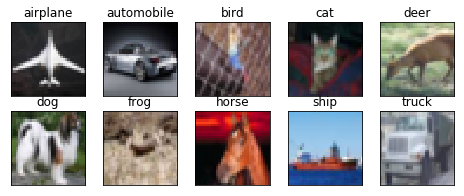

Current time: 2019-07-30 02:27:42.284386


In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

## Required Methods

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 17:35:27.899602


In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)
  
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 17:35:30.684457


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 17:35:32.816090


In [0]:
from sklearn.metrics import accuracy_score #works
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# import for showing the confusion matrix
import itertools


def show_classification_matrix(Y_pred,test_labels):
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(test_labels,axis = 1) 
  # # compute the confusion matrix
  print("Confusion matrix:\n%s" % confusion_matrix(y_true=Y_true, y_pred=Y_pred_classes))
  # compute the confusion matrix
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  return confusion_mtx


In [0]:
def show_misclassified_images(Y_pred,Y_true_nor,X_test):
  
  class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

  # print(score)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(Y_true_nor,axis = 1) 
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Errors are difference between predicted labels and true labels
  errors = (Y_pred_classes - Y_true != 0)
  errors
  Y_pred_classes_errors = Y_pred_classes[errors]
  pred_errors = Y_pred_classes_errors
  Y_pred_errors = Y_pred[errors]
  Y_true_errors = Y_true[errors]
  obs_errors = Y_true_errors
  
  X_test_errors = X_test[errors]
  img_errors = X_test_errors
  # Probabilities of the wrong predicted numbers
  Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
  # Predicted probabilities of the true values in the error set
  true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
  # Difference between the probability of the predicted label and the true label
  delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
  # Sorted list of the delta prob errors
  sorted_dela_errors = np.argsort(delta_pred_true_errors)
  most_important_errors = sorted_dela_errors[-30:]
  errors_index = most_important_errors
  """ This function shows 6 images with their predicted and real labels"""
#   n = 0
#   nrows = 2
#   ncols = 3
  n = 0
  nrows = 6
  ncols = 5
 
  fig, ax = plt.subplots(nrows,ncols,figsize=(22, 22), sharex=True,sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error = errors_index[n]
#             print('\n')
#       ax[row,col].imshow((img_errors[error]).reshape((32,32)))
      ax[row,col].imshow((img_errors[error]))
      ax[row,col].set_title("Pred :{}\nTrue :{}".format(class_names[pred_errors[error]],class_names[obs_errors[error]]))
#             print('\n') 
      n += 1
#             print("value:",n)
  # If you don't do tight_layout() you'll have weird overlaps
  plt.tight_layout()
  
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 17:35:38.465209


In [0]:
import operator
from PIL import Image
from PIL import ImageDraw
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

def show_misclassified_gradcam_heatmap_images(Y_pred,Y_true_nor,X_test):
  
  class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

  # print(score)
  # Convert validation observations to one hot vectors
  Y_true = np.argmax(Y_true_nor,axis = 1) 
  # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Errors are difference between predicted labels and true labels
  errors = (Y_pred_classes - Y_true != 0)
  errors
  Y_pred_classes_errors = Y_pred_classes[errors]
  pred_errors = Y_pred_classes_errors
  Y_pred_errors = Y_pred[errors]
  Y_true_errors = Y_true[errors]
  obs_errors = Y_true_errors
  
  X_test_errors = X_test[errors]
  img_errors = X_test_errors
  # Probabilities of the wrong predicted numbers
  Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
  # Predicted probabilities of the true values in the error set
  true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
  # Difference between the probability of the predicted label and the true label
  delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
  # Sorted list of the delta prob errors
  sorted_dela_errors = np.argsort(delta_pred_true_errors)
  most_important_errors = sorted_dela_errors[-30:]
  errors_index = most_important_errors
  """ This function shows 6 images with their predicted and real labels"""
#   n = 0
#   nrows = 2
#   ncols = 3
  n = 0
  nrows = 6
  ncols = 5
 
  fig, ax = plt.subplots(nrows,ncols,figsize=(22, 22), sharex=True,sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error = errors_index[n]
#             print('\n')
#       ax[row,col].imshow((img_errors[error]).reshape((32,32)))
## added for gradcam
      img = np.copy(img_errors[error])
      x = np.expand_dims(img_errors[error], axis=0)
      class_idx = pred_errors[error]
      class_output =  modelmod.output[:, class_idx] ##modelCiphar.output[:, class_idx
      last_conv_layer = modelmod.get_layer("conv2d_493")
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([modelmod.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x])
      for i in range(10):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
       
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
      heatmap = cv2.resize(heatmap, (img_errors[error].shape[1], img_errors[error].shape[0]))
      heatmap = np.uint8(255 * heatmap)

      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      heatmap = heatmap/255
      
      for i in range(len(heatmap)):
        for j in range(len(heatmap[0])):
          if heatmap[i][j][1]<=0.01 and heatmap[i][j][2]<=0.01:
            heatmap[i][j] = 0
        
#       result = Image.blend(img_errors[error], heatmap, alpha=0.5)
      superimposed_img = 0.5*(img_errors[error]) + 0.5*heatmap
      ax[row,col].imshow((superimposed_img))
  ## end of addition for gradcam
#       ax[row,col].imshow((img_errors[error]))
      ax[row,col].set_title("Pred :{}\nTrue :{}".format(class_names[pred_errors[error]],class_names[obs_errors[error]]))
#             print('\n') 
      n += 1
#             print("value:",n)
  # If you don't do tight_layout() you'll have weird overlaps
  plt.tight_layout()

Current time: 2019-07-30 17:38:14.923928


## Defining Resnet Model Architecture

**Have taken resnet model architecture and did following architectural changes to suit my input dataset ciphar10.**
- Initial Convolution filter of 7x7 which came from resnet has been replaced with two block of _conv_bn_relu with 32 and 64 filter.
- All stride of (2,2) has been replaced with stride of (1,1) as this suits our input ciphar10 small resolution images. This has also helped to carry forward features at more depth of network.
- A max pooling layer after each convolution block into repeating ones been added to downsample.
- Convolution filter of 1x1 has been added after all repeating convolution blocks which wil help us to consolidate features and here no of filters been made same as no of class. Activation function of softmax here been experiemented.
- GAP has been used here for prediction
- Dese layers have been removed.

In [0]:
def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)


def _conv_bn_relu(**conv_params):
    """Helper to build a conv -> BN -> relu block
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        conv = Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f


def _bn_relu_conv(**conv_params):
    """Helper to build a BN -> relu -> conv block.
    This is an improved scheme proposed in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        activation = _bn_relu(input)
        return Conv2D(filters=filters, kernel_size=kernel_size,
                      strides=strides, padding=padding,
                      kernel_initializer=kernel_initializer,
                      kernel_regularizer=kernel_regularizer)(activation)

    return f


def _shortcut(input, residual):
    """Adds a shortcut between input and residual block and merges them with "sum"
    """
    # Expand channels of shortcut to match residual.
    # Stride appropriately to match residual (width, height)
    # Should be int if network architecture is correctly configured.

#     print(input.shape, residual.shape)
    input_channels = int(input.shape[-1])
#     r = Conv2D(filters=input_channels, kernel_size=(1, 1),
#                            strides=(1,1),
#                            padding="same",
#                            kernel_initializer="he_normal",
#                            kernel_regularizer=l2(1e-4))(residual)
    r = residual
    c = concatenate([input, r])
    c = Conv2D(filters=input_channels, kernel_size=(1, 1),
                           strides=(1,1),
                           padding="same",
                           kernel_initializer="he_normal",
                           kernel_regularizer=l2(1e-4))(c)
    return c


def _residual_block(block_function, filters, repetitions, is_first_layer=False):
    """Builds a residual block with repeating bottleneck blocks.
    """
    def f(input):
        new_filters = filters
#         print(' - - - -')
        for i in range(repetitions):
            init_strides = (1, 1)
#             print('--> newf', new_filters)
            input = block_function(filters=new_filters, init_strides=init_strides,
                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)
            new_filters *= 2
        return input

    return f


def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Basic 3 X 3 convolution blocks for use on resnets with layers <= 34.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = Conv2D(filters=filters, kernel_size=(3, 3),
                           strides=init_strides,
                           padding="same",
                           kernel_initializer="he_normal",
                           kernel_regularizer=l2(1e-4))(input)
        else:
            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),
                                  strides=init_strides)(input)

        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)
        return _shortcut(input, residual)

    return f


def bottleneck(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Bottleneck architecture for > 34 layer resnet.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    Returns:
        A final conv layer of filters * 4
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv_1_1 = Conv2D(filters=filters, kernel_size=(1, 1),
                              strides=init_strides,
                              padding="same",
                              kernel_initializer="he_normal",
                              kernel_regularizer=l2(1e-4))(input)
        else:
            conv_1_1 = _bn_relu_conv(filters=filters, kernel_size=(1, 1),
                                     strides=init_strides)(input)

        conv_3_3 = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv_1_1)
        residual = _bn_relu_conv(filters=filters * 4, kernel_size=(1, 1))(conv_3_3)
        return _shortcut(input, residual)

    return f


def _handle_dim_ordering():
    global ROW_AXIS
    global COL_AXIS
    global CHANNEL_AXIS
    if K.image_dim_ordering() == 'tf':
        ROW_AXIS = 1
        COL_AXIS = 2
        CHANNEL_AXIS = 3
    else:
        CHANNEL_AXIS = 1
        ROW_AXIS = 2
        COL_AXIS = 3


def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier


class ResnetBuilder(object):
    @staticmethod
    def build(input_shape, num_outputs, block_fn, repetitions):
        """Builds a custom ResNet like architecture.
        Args:
            input_shape: The input shape in the form (nb_channels, nb_rows, nb_cols)
            num_outputs: The number of outputs at final softmax layer
            block_fn: The block function to use. This is either `basic_block` or `bottleneck`.
                The original paper used basic_block for layers < 50
            repetitions: Number of repetitions of various block units.
                At each block unit, the number of filters are doubled and the input size is halved
        Returns:
            The keras `Model`.
        """
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        # Permute dimension order if necessary
        if K.image_dim_ordering() == 'tf':
            input_shape = (input_shape[1], input_shape[2], input_shape[0])

        # Load function from str if needed.
        block_fn = _get_block(block_fn)

        input = Input(shape=input_shape)
#         conv1 = _conv_bn_relu(filters=16, kernel_size=(3, 3), padding="same")(input)
        conv1 = _conv_bn_relu(filters=32, kernel_size=(3, 3), padding="same")(input)
        conv1 = _conv_bn_relu(filters=64, kernel_size=(3, 3), padding="same")(conv1)

        # Receptive -> 7x7
        block = conv1
        filters = 64
        for i, r in enumerate(repetitions):
#             print('going in, block', block.shape)
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)
            print('after residual, block', block.shape)
#             block = _conv_bn_relu(filters=filters*2, kernel_size=(1, 1), padding="same")(block)
#             print('after 1x1, block', block.shape)
            # if i != len(repetitions) - 1 and i != len(repetitions) - 2:
            if i != len(repetitions) - 1:
              block = MaxPooling2D(pool_size=(2, 2))(block)
            print('after max, block', block.shape)
            filters *= 2

        # Last activation
        block = _bn_relu(block)

        # Classifier block
        block = Conv2D(filters=10, kernel_size=(1,1), padding='same', activation='softmax')(block)
        block = GlobalAveragePooling2D()(block)

        model = Model(inputs=input, outputs=block)
        return model

    @staticmethod
    def build_resnet_18(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2, 2])

    @staticmethod
    def build_resnet_34(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_50(input_shape, num_outputs):
      return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 3, 1])
      # return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 2, 2, 1])
#         return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])

    @staticmethod
    def build_resnet_101(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 23, 3])

    @staticmethod
    def build_resnet_152(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 8, 36, 3])

## Image Data Preprocessing

In [0]:
# preprocess input
mean = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
std = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
print("Channel Mean before Normalisation : ", mean)
print("Channel Std before Normalisation : ", std)

Channel Mean before Normalisation :  [[[[125.306915 122.95039  113.86539 ]]]]
Channel Std before Normalisation :  [[[[125.306915 122.95039  113.86539 ]]]]


Here I am only converting datatype to float because then later 

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# train_features = train_features.astype('float32')
# test_features = test_features.astype('float32')

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)


Current time: 2019-07-30 13:15:51.146082


In [0]:
# preprocess input
mean = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
std = np.std(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
print("Channel Mean after Normalisation: ", mean)
print("Channel Std after Normalisation: ", std)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)


Channel Mean after Normalisation:  [[[[0.4914009  0.48215896 0.4465308 ]]]]
Channel Std after Normalisation:  [[[[0.24703279 0.24348423 0.26158753]]]]
Current time: 2019-07-30 07:35:22.604352


In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

pixel_level = False

# Customdatagen = ImageDataGenerator(
#     horizontal_flip=False,
#     zoom_range=0.1,
#     preprocessing_function=get_random_eraser(p=0.5, s_l=0.02, s_h=0.5, pixel_level=pixel_level)
# )
# currentDT = datetime.datetime.now()
# print("Current time:", currentDT)


In [0]:
# train_features.mean()

In [0]:
# Customdatagen.fit(train_features)
# currentDT = datetime.datetime.now()
# print("Current time:", currentDT)

In [0]:
train_features.mean()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

0.4733649

Current time: 2019-07-30 02:27:44.790252


(-0.5, 31.5, 31.5, -0.5)

Current time: 2019-07-30 02:27:44.830902


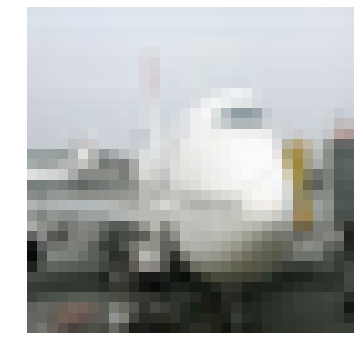

In [0]:
plt.imshow(train_features[185])
plt.axis('off')
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

W0730 02:27:45.010830 140360426280832 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 31.5, 31.5, -0.5)

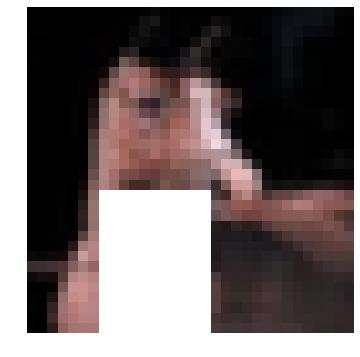

In [0]:
eraser = get_random_eraser()

plt.imshow(eraser(train_features[85]), interpolation="nearest")
plt.axis('off')

## Model Development

#### Global Variables for Models

In [0]:
batch_size = 256  ## I could not use 512 due to OOM and hence constrained to use this reduced value
nb_classes = 10
nb_epoch = 1  # Only finding lr
data_augmentation = True
num_epoch = 50

In [0]:
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.regularizers import l2
from keras.layers.merge import add
# img_channels
nb_classes =10
# modelmod = ResNet18(input_shape=(32,32,3),
#                     classes=10)
modelmod = ResnetBuilder.build_resnet_18((3, 32, 32), nb_classes)

# sgd = SGD(lr=0.1, momentum=0.9, nesterov=True)

# modelmod.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

optim = SGD(decay=1e-9, momentum=0.9, nesterov=True)
# optim = Adam()

modelmod.compile(loss='categorical_crossentropy',
              optimizer=optim,
             metrics=['accuracy'])


modelmod.summary()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

after residual, block (?, 32, 32, 64)
after max, block (?, 16, 16, 64)
after residual, block (?, 16, 16, 64)
after max, block (?, 8, 8, 64)
after residual, block (?, 8, 8, 64)
after max, block (?, 4, 4, 64)
after residual, block (?, 4, 4, 64)
after max, block (?, 4, 4, 64)
Current time: 2019-07-30 16:27:04.950295
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_478 (Conv2D)             (None, 32, 32, 32)   896         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_372 (BatchN (None, 32, 32, 32)   128         conv2d_478[0][0]          

In [0]:
from keras.utils import plot_model
plot_model(modelmod, to_file='model_assignment13.png')

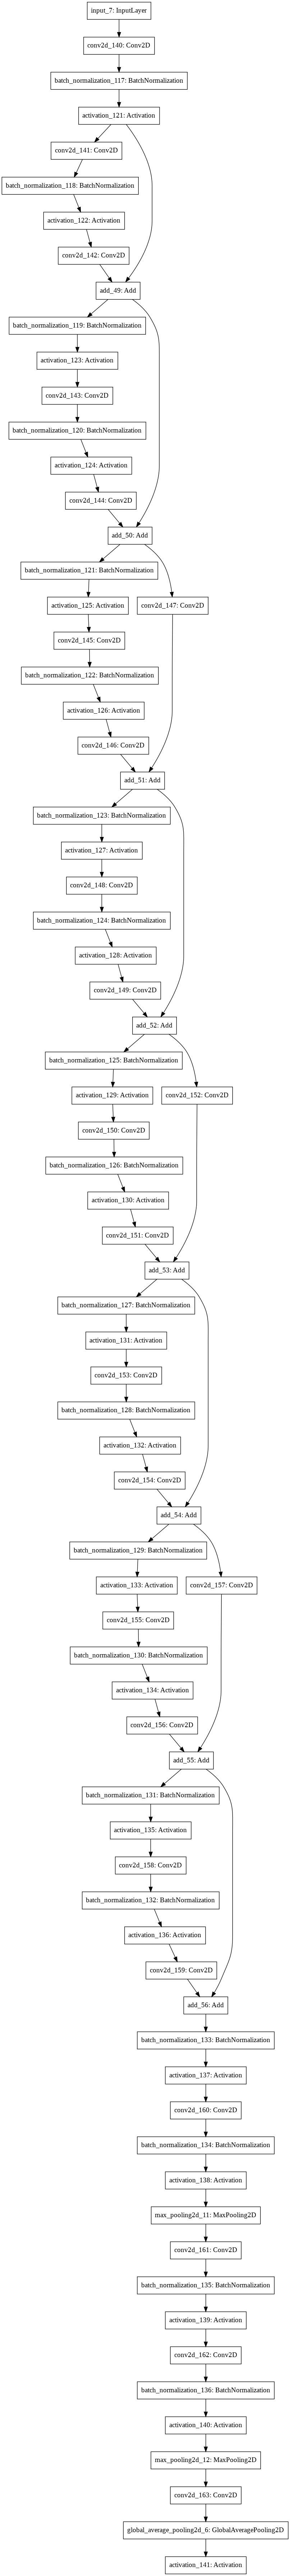

In [0]:
from IPython.display import Image
Image(filename='model_assignment13.png')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Current time: 2019-07-30 13:28:52.921124


#### Callback for Finding Learning Rate Range

We will use LRFinder to obtain a loss plot, and visually inspect it to determine the initial loss plot.

Learning rate finder callback setup requires to find out number of class first.

In [0]:
# Learning rate finder callback setup
num_samples = train_features.shape[0]
print("Number of Samples:",num_samples)

Number of Samples: 50000


Exponential lr finder and we will use this for larger range search

In [0]:
# Uncomment the validation_data flag to reduce speed but get a better idea of the learning rate
lr_finder = LRFinder(num_samples, batch_size, minimum_lr=1e-4, maximum_lr=5.,
                     lr_scale='exp',
                     validation_data=(test_features, test_labels),  # use the validation data for losses
                     validation_sample_rate=5,
                     save_dir='/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/', verbose=True)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 02:34:27.033272


In [0]:
# plot the previous values if present
LRFinder.plot_schedule_from_file('weights/', clip_beginning=10, clip_endding=5)
currentDT = datetime.datetime.now()
print("Current time:", currentDT)


weights/losses.npy and weights/lrs.npy could not be found at directory : {weights/}
Current time: 2019-07-30 02:34:27.046639


In [0]:
# Compile the model
# optimizer = sgd()
# sgd = optimizers.SGD(lr=0.01, momentum=0.9) 
# sgd = SGD(lr=0.1, momentum=0.9, decay=5e-4, nesterov=True)

# modelmod.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# currentDT = datetime.datetime.now()
# print("Current time:", currentDT)

## Image Pixel Normalisation

Image Normalisation
-We will use Normalization values of: (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010) to normalise ciphar10 images.The first three values are the means over each channel, while the second triple are the standard deviations.

In [0]:
# preprocess input
mean = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
std = np.std(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
print("Channel Mean before Centering: ", mean)
print("Channel Std before Centering: ", std)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Channel Mean before Centering:  [[[[0.49162543 0.4823837  0.4467557 ]]]]
Channel Std before Centering:  [[[[0.27889767 0.2757676  0.29190406]]]]
Current time: 2019-07-30 02:34:27.720412


This block explains how imagenent mean and std been taken care of as part of centering. Here mean and std values of all three (RGB) been provided and they will be used centering. So mean value will be first substracted and then divided by std value.

In [0]:
rgb_mean = (0.4914, 0.4822, 0.4465)
rgb_std = (0.2470, 0.2435, 0.2616)

train_features.shape

def preprocess_data(data):
  ## This function have the logic from https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
  data[0, :, :] -= rgb_mean[0]
  data[1, :, :] -= rgb_mean[1]
  data[2, :, :] -= rgb_mean[2]
  
  data[0, :, :] /= rgb_std[0]
  data[1, :, :] /= rgb_std[1]
  data[2, :, :] /= rgb_std[2]
  return data
   

from keras.applications.imagenet_utils import preprocess_input


currentDT = datetime.datetime.now()
print("Current time:", currentDT)

(50000, 32, 32, 3)

Current time: 2019-07-30 05:48:54.365109


In [0]:
train_features = preprocess_data(train_features)
test_features = preprocess_data(test_features)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)
     

Current time: 2019-07-30 02:34:27.756105


In [0]:
# preprocess input
mean = np.mean(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
std = np.std(train_features, axis=(0, 1, 2), keepdims=True).astype('float32')
print("Channel Mean after Centering: ", mean)
print("Channel Std after Centering: ", std)

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Channel Mean after Centering:  [[[[0.49162543 0.4823837  0.4467557 ]]]]
Channel Std after Centering:  [[[[0.27889767 0.2757676  0.29190406]]]]
Current time: 2019-07-30 02:34:28.308199


## Network Training Parameter

**Batch**
- Batch size 128

**Image Augmentation**
- Random Crop of 32 with padding of 4px
- Horizontal Flip (0.5)

**Optimiser**
- Optimizer: SGD, Weight-Decay: 5e-4

**LR Policy**
- OneCycleLR

In [0]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
#     iaa.Affine(rotate=(-25, 25)),
#     iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Fliplr(0.5) ,
    iaa.CropAndPad(px=(0, 4),pad_mode="edge")
], random_order=True)



In [0]:
from imgaug import augmenters as iaa

seqVal = iaa.Sequential([
#     iaa.Affine(rotate=(-25, 25)),
#     iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Fliplr(0.5) ,
#     iaa.CropAndPad(px=(0, 4),pad_mode="edge")
], random_order=True)


Here two ImageDataGenerator have been defined and pre processing function using imgaug library being referred here. imgaug lib has been referred here as it supports "crop with padding" and flip.

In [0]:
train_datagen = ImageDataGenerator(
#     rescale= 1./255,
    featurewise_center=False,
    featurewise_std_normalization=False,
    preprocessing_function=seq.augment_image
    
    )

test_datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    preprocessing_function=seqVal.augment_image
#     rescale=1./255
)

We will now calculate mean and std for both dataset and then will override with our imagenet provided mean and std.

In [0]:
# train_datagen.fit(train_features)
# test_datagen.fit(test_features)

# train_datagen.mean = rgb_mean
# train_datagen.std = rgb_std

# test_datagen.mean = rgb_mean
# test_datagen.std = rgb_std

In [0]:
cutoutpreprocessing_function=get_random_eraser(p=0.5, s_l=0.02, s_h=0.5, pixel_level=pixel_level)

*italicized text*## Model Training

### LR Value Finder

In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR.hdf5'

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [lr_finder,
             ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]


# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 02:34:30.249340
Current time: 2019-07-30 02:34:30.250390


Ensure that number of epochs = 1 when calling fit() because we are using LR finder here with wide learning rate search

In [0]:
batch_size = 128
model1Details = modelmod.fit_generator(train_datagen.flow(train_features, train_labels, batch_size=batch_size),
                                     steps_per_epoch=len(train_features) / batch_size,
                                     epochs=nb_epoch,
                                     verbose=0,
                                     shuffle=False,
                                     callbacks=callbackscustomx,
                                     validation_data= test_datagen.flow(test_features, test_labels, batch_size=batch_size),##(test_features, test_labels)
                                     validation_steps= train_features.shape[0] // batch_size,
                                    )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

W0730 02:34:30.750432 140360426280832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 - LRFinder: val_loss: 3.8199 - lr = 0.00010571 
 - LRFinder: val_loss: 3.8575 - lr = 0.00011174 
 - LRFinder: val_loss: 3.8903 - lr = 0.00011811 
 - LRFinder: val_loss: 3.7818 - lr = 0.00012485 
 - LRFinder: val_loss: 3.8376 - lr = 0.00013197 
 - LRFinder: val_loss: 3.7971 - lr = 0.00013950 
 - LRFinder: val_loss: 3.8104 - lr = 0.00014746 
 - LRFinder: val_loss: 3.7740 - lr = 0.00015588 
 - LRFinder: val_loss: 3.7443 - lr = 0.00016477 
 - LRFinder: val_loss: 3.7104 - lr = 0.00017417 
 - LRFinder: val_loss: 3.6983 - lr = 0.00018411 
 - LRFinder: val_loss: 3.6570 - lr = 0.00019461 
 - LRFinder: val_loss: 3.6754 - lr = 0.00020571 
 - LRFinder: val_loss: 3.7002 - lr = 0.00021745 
 - LRFinder: val_loss: 3.5970 - lr = 0.00022986 
 - LRFinder: val_loss: 3.5910 - lr = 0.00024297 
 - LRFinder: val_loss: 3.6057 - lr = 0.00025683 
 - LRFinder: val_loss: 3.5671 - lr = 0.00027149 
 - LRFinder: val_loss: 3.5318 - lr = 0.00028698 
 - LRFinder: val_loss: 3.5711 - lr = 0.00030335 
 - LRFinder: val_los

In [0]:
print(model1Details.history.keys())
print(model1Details.history['val_acc'])
print(model1Details.history['val_loss'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.09997574385510996]
[18.456667848885598]


#### Obtaining LR Min and Max Values from One Cycle LR Finder

Current time: 2019-07-30 02:49:55.332329


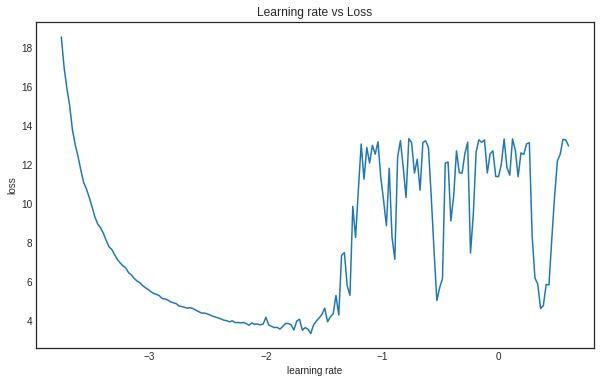

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)
lr_finder.plot_schedule(clip_beginning=10, clip_endding=5)

Current time: 2019-07-30 02:49:55.633252


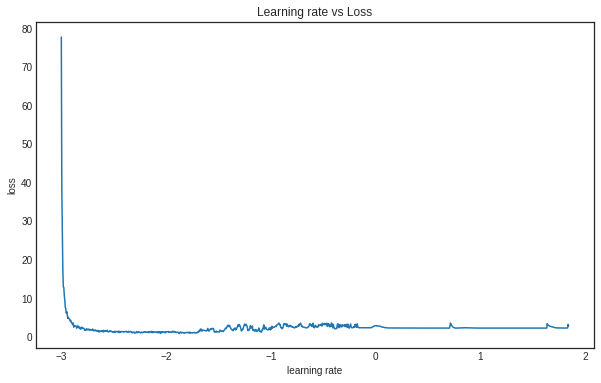

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)
lr_finder.plot_schedule_from_file('/content/gdrive/My Drive/ModelWeightsBackup/')

**Observations from above Learning Rate Graph**
- Min LR 1e-3
- Max LR 1e-2

Thumb rule is that ** Minimum is 10x smaller than the max found above**

## Cross Validating LR Ranger by another Library

I have referred now [Setting the learning rate of your neural network.](https://www.jeremyjordan.me/nn-learning-rate/) as this one has better LR finder than https://github.com/titu1994/keras-one-cycle.

In [0]:
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import Callback


class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

I am creating here resnet 18 block. Here my input is imageinput size and no of classes. Initial values of weight decay, momentum and LR been provided during compilation time which will be later overridden during OneCycle learning.

In [0]:
modelmodLR = ResnetBuilder.build_resnet_18((3, 32, 32), nb_classes)

# sgd = SGD(lr=0.1, momentum=0.9, nesterov=True)

# modelmod.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

optim = SGD(decay=1e-9, momentum=0.9, nesterov=True)
# optim = Adam()

modelmodLR.compile(loss='categorical_crossentropy',
              optimizer=optim,
             metrics=['accuracy'])

after residual, block (?, 32, 32, 64)
after max, block (?, 16, 16, 64)
after residual, block (?, 16, 16, 64)
after max, block (?, 8, 8, 64)
after residual, block (?, 8, 8, 64)
after max, block (?, 4, 4, 64)
after residual, block (?, 4, 4, 64)
after max, block (?, 4, 4, 64)
Current time: 2019-07-30 17:42:04.137052


In [0]:
 ## https://www.jeremyjordan.me/nn-learning-rate/
  lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=10, 
                                 steps_per_epoch=np.ceil(len(train_features)/batch_size), 
                                 epochs=3)

In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_asst_13_One_Cycle_LR_CP_2nd.hdf5'
filepathx ='/content/gdrive/My Drive/eva_asst_13_One_Cycle_LR__LRFinderCP_2nd.hdf5'

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [lr_finder,
             ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]


# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 17:43:33.690773
Current time: 2019-07-30 17:43:33.696131


In [0]:
modelmodLR.compile(loss='categorical_crossentropy',
              optimizer=optim,
             metrics=['accuracy'])


# modelmod.summary()
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 17:42:45.227214


In [0]:
batch_size = 128
modelmodlrDetails = modelmodLR.fit_generator(train_datagen.flow(train_features, train_labels, batch_size=batch_size),
                                     steps_per_epoch=len(train_features) / batch_size,
                                     epochs=3,
                                     verbose=1,
                                     shuffle=False,
                                     callbacks=callbackscustomx,
                                     validation_data=(test_features, test_labels)
                                    )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Epoch 1/3
  3/390 [..............................] - ETA: 13:58 - loss: 3.6931 - acc: 0.0938

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.777699). Check your callbacks.
  % delta_t_median)


391/390 [==============================] - 85s 216ms/step - loss: 2.7338 - acc: 0.3200 - val_loss: 7.2068 - val_acc: 0.1038

Epoch 00001: val_acc improved from -inf to 0.10380, saving model to /content/gdrive/My Drive/eva_asst_13_One_Cycle_LR__LRFinderCP_2nd.hdf5
Epoch 2/3
391/390 [==============================] - 77s 196ms/step - loss: 2.4427 - acc: 0.1405 - val_loss: 2.5753 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.10380
Epoch 3/3
391/390 [==============================] - 76s 193ms/step - loss: 2.6487 - acc: 0.1134 - val_loss: 3.0161 - val_acc: 0.0820

Epoch 00003: val_acc did not improve from 0.10380
Current time: 2019-07-30 17:49:13.674023


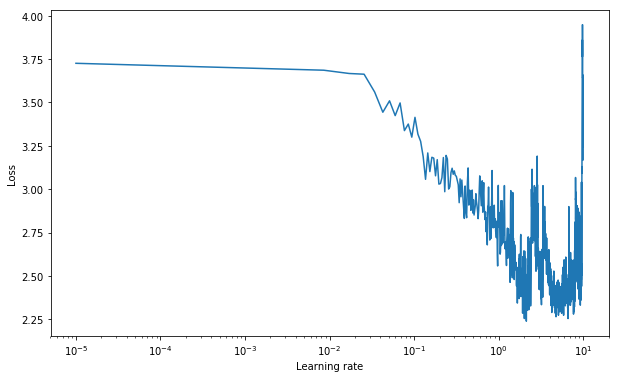

In [0]:
lr_finder.plot_loss()

### Functions for finding monetum ranges

In [0]:
MOMENTUMS = [0.9, 0.95, 0.99]


In [0]:
os.chdir('/content/keras-one-cycle/')
!pwd

from clr import LRFinder
from clr import OneCycleLR

os.chdir('/content/')
!pwd

/content/keras-one-cycle
/content


In [0]:
    momen_lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.001, maximum_lr=0.01,
                         validation_data=(test_features, test_labels),
                         validation_sample_rate=5,
                         lr_scale='linear', save_dir='/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/momentum/momentum-%s/' % str(MOMENTUMS),
                         verbose=True)

In [0]:
#     # lr doesnt matter as it will be over written by the callback
sgd = SGD(lr=0.002, momentum=MOMENTUMS, nesterov=True)

In [0]:
modelmod.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 03:00:45.396730


In [0]:
# filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR_Mom.hdf5'
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR.hdf5'

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=False)]


# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 03:00:45.405965
Current time: 2019-07-30 03:00:45.408982


#### Findng optimal momentum based on earlier found LR

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

# for momentum in MOMENTUMS:
for momentum in MOMENTUMS:
  
  
  print("Momentum Value:",momentum)
  print("\n")
  momen_lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.001, maximum_lr=0.01,
                             validation_data=(test_features, test_labels),
                             validation_sample_rate=5,
                             lr_scale='linear', save_dir='/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/momentum/momentum-%s/' % str(momentum),
                             verbose=True)
    
  # lr doesnt matter as it will be over written by the callback
  sgd = SGD(lr=0.002, momentum=momentum, nesterov=True)
  
  modelmod.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  
  modelmod.load_weights('/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR.hdf5')

  callbackscustomx = [momen_lr_finder,ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=False)]

  model1Details = modelmod.fit_generator(train_datagen.flow(train_features, train_labels, batch_size=batch_size),
                                       steps_per_epoch=80, #len(train_features) / 32,
                                       epochs=nb_epoch,
                                       verbose=1,
                                       shuffle=False,
                                       callbacks=callbackscustomx,
                                       validation_data=(test_features, test_labels)
                                       )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 03:00:45.430914
Momentum Value: 0.9


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 18.4957 - acc: 0.0975 - LRFinder: val_loss: 18.2780 - lr = 0.00280000 
 - LRFinder: val_loss: 19.0586 - lr = 0.00282308 
80/80 [==============================] - 123s 2s/step - loss: 18.4917 - acc: 0.0978 - val_loss: 18.4542 - val_acc: 0.1000
	LR Finder : Saved the losses and learning rate values in path : {/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/momentum/momentum-0.9/}

Epoch 00001: saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR.hdf5
Momentum Value: 0.95


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 18.4517 - acc: 0.1001 - LRFinder: val_loss: 18.7279 - lr = 0.00280000 
 - LRFinder: val_loss: 18.6271 - lr = 0.00282308 
80/80 [==============================] - 124s 2s/step - loss: 18.4514 - acc: 0.1001 - val_loss: 18.4508 - val_acc: 0.1000
	LR Finder : Saved the losses and learni

from plot we see, the model isnt impacted by the weight_decay very much at all

Current time: 2019-07-30 03:07:26.016716


Text(0.5, 1.0, 'Momentum')

Text(0.5, 0, 'Learning rate')

Text(0, 0.5, 'Validation Loss')

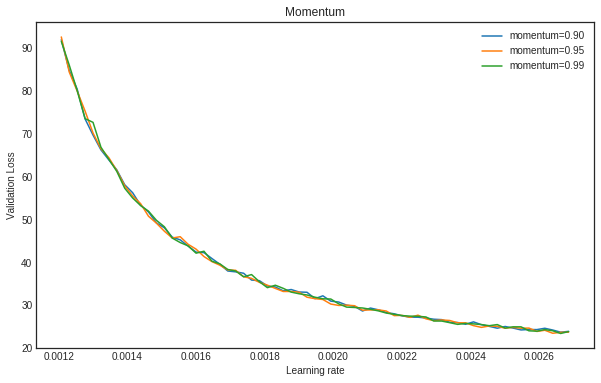

In [0]:
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

for momentum in MOMENTUMS:
    directory = '/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/momentum/momentum-%s/' % str(momentum)

    losses, lrs = LRFinder.restore_schedule_from_dir(directory, 10, 5)
    plt.plot(lrs, losses, label='momentum=%0.2f' % momentum)

plt.title("Momentum")
plt.xlabel("Learning rate")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


**From plot we see, the model isnt impacted by the weight_decay very much at all. so we can use any of them.**

#### Findng optimal Weight Decay based on earlier found LR

In [0]:
# FINEGRAINED WEIGHT DECAY FACTORS
WEIGHT_DECAY_FACTORS = [5e-4, 5e-5, 5e-6]


currentDT = datetime.datetime.now()
print("Current time:", currentDT)

# for momentum in MOMENTUMS:
for weight_decay in WEIGHT_DECAY_FACTORS:
  
  
  print("Weight Decay Value:",weight_decay)
  print("\n")
  weight_lr_finder = LRFinder(num_samples, batch_size, minimum_lr=0.001, maximum_lr=0.01,
                             validation_data=(test_features, test_labels),
                             validation_sample_rate=5,
                             lr_scale='linear', save_dir='/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/weight_decay/weight_decay-%s/' % str(weight_decay),
                             verbose=True)
    
  # lr doesnt matter as it will be over written by the callback
  sgd = SGD(lr=0.002, momentum=0.9, decay=weight_decay, nesterov=True)
  
  modelmod.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  
  modelmod.load_weights('/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR.hdf5')

  callbackscustomx = [weight_lr_finder,ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=False)]

  model1Details = modelmod.fit_generator(train_datagen.flow(train_features, train_labels, batch_size=batch_size),
                                       steps_per_epoch=80, #len(train_features) / 32,
                                       epochs=nb_epoch,
                                       verbose=1,
                                       shuffle=False,
                                       callbacks=callbackscustomx,
                                       validation_data=(test_features, test_labels)
                                       )
                                                
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 03:07:27.009241
Weight Decay Value: 0.0005


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 18.4007 - acc: 0.1027 - LRFinder: val_loss: 18.1903 - lr = 0.00280000 
 - LRFinder: val_loss: 18.5932 - lr = 0.00282308 
80/80 [==============================] - 124s 2s/step - loss: 18.4024 - acc: 0.1025 - val_loss: 18.4421 - val_acc: 0.1000
	LR Finder : Saved the losses and learning rate values in path : {/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/weight_decay/weight_decay-0.0005/}

Epoch 00001: saving model to /content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR.hdf5
Weight Decay Value: 5e-05


Epoch 1/1
79/80 [============================>.] - ETA: 1s - loss: 18.4034 - acc: 0.1024 - LRFinder: val_loss: 18.4653 - lr = 0.00280000 
 - LRFinder: val_loss: 18.6164 - lr = 0.00282308 
80/80 [==============================] - 124s 2s/step - loss: 18.4036 - acc: 0.1023 - val_loss: 18.4401 - val_acc: 0.1000
	LR Finder : Save

Text(0.5, 1.0, 'Weight Decay')

Text(0.5, 0, 'Learning rate')

Text(0, 0.5, 'Validation Loss')

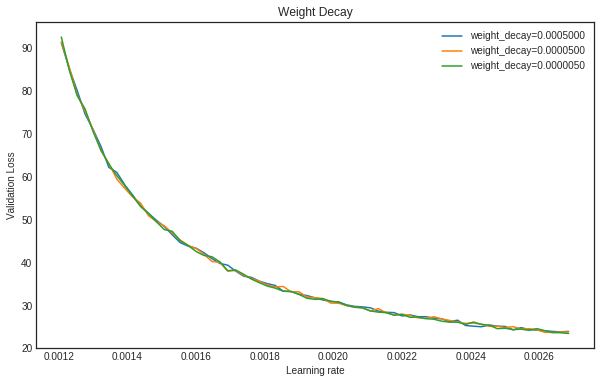

In [0]:
for weight_decay in WEIGHT_DECAY_FACTORS:
    directory = '/content/gdrive/My Drive/ModelWeightsBackup/asgnmnt13/weight_decay/weight_decay-%s/' % str(weight_decay)

    losses, lrs = LRFinder.restore_schedule_from_dir(directory, 10, 5)
    plt.plot(lrs, losses, label='weight_decay=%0.7f' % weight_decay)

plt.title("Weight Decay")
plt.xlabel("Learning rate")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

**From plot we see, the model isnt impacted by the weight_decay very much at all. So we can use any of them.**

### Training with OneCycleLR

Once we find the maximum learning rate, we can then move onto using the OneCycleLR callback with SGD to train our model.

In [0]:
!ls -ltr
os.chdir('/content/')

total 288
drwxr-xr-x 1 root root   4096 Jul 19 16:14 sample_data
drwxr-xr-x 6 root root   4096 Jul 30 02:27 keras-one-cycle
drwxr-xr-x 4 root root   4096 Jul 30 02:27 cutout-random-erasing
-rw-r--r-- 1 root root 275557 Jul 30 02:27 model_assignment13.png
drwx------ 3 root root   4096 Jul 30 02:34 gdrive


In [0]:
from clr import OneCycleLR

In [0]:
train_features.shape[0]

50000

Here are the parameters defined which I am going to use later in LR Finder.

In [0]:
max_lr=.31  ## This is taken from LR Finder
epoch = 50

num_samples = train_features.shape[0]
num_epoch = 50  #@param {type:"slider", min:0, max:100, step:1}
end_percentage =0.1
scale_percentage = None
maximum_momentum=0.99 #@param ["0.9", "0.95", "0.975"] {type:"raw"}
minimum_momentum=0.9 #@param ["0.9", "0.95", "0.975"] {type:"raw"}
# batch_size = '512'
batch_size= 128 #@param ["512", "256", "128", "64"] {type:"raw"}

In [0]:
!nvidia-smi

Tue Jul 30 03:14:17 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    57W / 149W |   8416MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

- This callback implements a cyclical learning rate policy (CLR). This is a special case of Cyclic Learning Rates, where we have only 1 cycle. After the completion of 1 cycle, the learning rate will decrease rapidly to 100th its initial lowest value

**Arguments**
- max_lr: Float. Initial learning rate. This also sets the starting learning rate (which will be 10x smaller than this), and will increase to this value during the first cycle.
- end_percentage: Float. The percentage of all the epochs of training that will be dedicated to sharply decreasing the learning rate after the completion of 1 cycle. Must be between 0 and 1.
- scale_percentage: Float or None. If float, must be between 0 and 1. If None, it will compute the scale_percentage automatically based on the `end_percentage`.
- maximum_momentum: Optional. Sets the maximum momentum (initial) value, which gradually drops to its lowest value in half-cycle, then gradually increases again to stay constant at this max value. Can only be used with SGD Optimizer.
- minimum_momentum: Optional. Sets the minimum momentum at the end of the half-cycle. Can only be used with SGD Optimizer.
- verbose: Bool. Whether to print the current learning rate after every epoch.

OneCycle object being instantiated here with values obtained from LR Finder range. Batch value already been specified in the assignment and same has been used here.
Weight decay and momentum value also been validated above from LR finder graph.

In [0]:
lr_manager = OneCycleLR(num_samples=num_samples, batchsize=batch_size, max_lr=max_lr, maximum_momentum=0.95, verbose=True)


currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 16:28:04.177048


In [0]:
# Compile the model here learning rate wil be overridden by call back latyer
# optimizer = sgd()
# sgd = optimizers.SGD(lr=0.01, momentum=0.9) 
sgd = SGD(decay=1e-4, lr=1, momentum=0.9, nesterov=True)

modelmod.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 16:28:09.418085


In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR_Fnl.hdf5'


In [0]:
filepathx ='/content/gdrive/My Drive/ModelWeightsBackup/eva_assignment_13_One_Cycle_LR_Fnl_2.0.hdf5'
filepathx ='/content/gdrive/My Drive/eva_assignment_13_One_Cycle_LR_Fnl_2.0.hdf5'


currentDT = datetime.datetime.now()
print("Current time:", currentDT)

callbackscustomx = [lr_manager,
             ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]


# callbackscustomx = [ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]
# callbackscustomx = [history,
#              ModelCheckpoint(filepathx, monitor='val_acc', verbose=1, save_best_only=True)]

currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Current time: 2019-07-30 16:28:16.282759
Current time: 2019-07-30 16:28:16.283549


In [0]:
train_features.shape[0] // batch_size

390

In [0]:
# https://github.com/amitkayal/keras-one-cycle
rev_epoch=10

In [0]:
#   batch_size= 64
#   modelCLR = modelmod.fit_generator(Customdatagen.flow(train_features, train_labels, batch_size=batch_size),
#                                        steps_per_epoch=train_features.shape[0] // batch_size,
#                                        epochs=epoch,
#                                        verbose=1,
#                                        shuffle=False,
#                                        callbacks=callbackscustomx,
#                                        validation_data=(test_features, test_labels)
#                                        )
  
modelCLR = modelmod.fit_generator(train_datagen.flow(train_features, train_labels, batch_size=batch_size),
                                  steps_per_epoch=train_features.shape[0] // batch_size,
                                  epochs=epoch,
                                  verbose=1,
                                  shuffle=False,
                                  callbacks=callbackscustomx,
#                                   validation_data= test_datagen.flow(test_features, test_labels, batch_size=batch_size),##(test_features, test_labels)
#                                   validation_steps= train_features.shape[0] // batch_size,
                                  validation_data=(test_features, test_labels)
                                  )
    

Class: <clr.OneCycleLR object at 0x7f56d38790b8>
Values: {'validation_data': None, 'model': <keras.engine.training.Model object at 0x7f56d2360a20>, 'initial_lr': 0.31, 'end_percentage': 0.1, 'scale': 0.1, 'max_momentum': 0.95, 'min_momentum': 0.85, 'verbose': True, '_update_momentum': True, 'clr_iterations': 0.0, 'history': {}, 'epochs': None, 'batch_size': 128, 'samples': 50000, 'steps': None, 'num_iterations': None, 'mid_cycle_id': None, 'params': {'epochs': 50, 'steps': 390, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}}
Epoch 1/50
  3/390 [..............................] - ETA: 15:26 - loss: 3.5964 - acc: 0.1510

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.258376). Check your callbacks.
  % delta_t_median)


390/390 [==============================] - 85s 218ms/step - loss: 2.5577 - acc: 0.5166 - val_loss: 2.7787 - val_acc: 0.4802
 - lr: 0.04311 - momentum: 0.95 

Epoch 00001: val_acc improved from -inf to 0.48020, saving model to /content/gdrive/My Drive/eva_assignment_13_One_Cycle_LR_Fnl_2.0.hdf5
Epoch 2/50
390/390 [==============================] - 77s 197ms/step - loss: 1.9619 - acc: 0.7091 - val_loss: 2.6033 - val_acc: 0.5484
 - lr: 0.05525 - momentum: 0.94 

Epoch 00002: val_acc improved from 0.48020 to 0.54840, saving model to /content/gdrive/My Drive/eva_assignment_13_One_Cycle_LR_Fnl_2.0.hdf5
Epoch 3/50
390/390 [==============================] - 77s 197ms/step - loss: 1.7122 - acc: 0.7586 - val_loss: 2.5410 - val_acc: 0.5006
 - lr: 0.06738 - momentum: 0.94 

Epoch 00003: val_acc did not improve from 0.54840
Epoch 4/50
390/390 [==============================] - 77s 197ms/step - loss: 1.5357 - acc: 0.7858 - val_loss: 1.8205 - val_acc: 0.6914
 - lr: 0.07952 - momentum: 0.93 

Epoch 00

**Observation from Model Training**
- Have been able to achieve 92.82% accuracy within 50 epoch and so did not proceed further
- Final learning rate after 50 epoch came out to be lr: 0.00681 and moementum of 0.95. My max learning rate was 0.3 and momentum was 0.9

## Model Evaluation

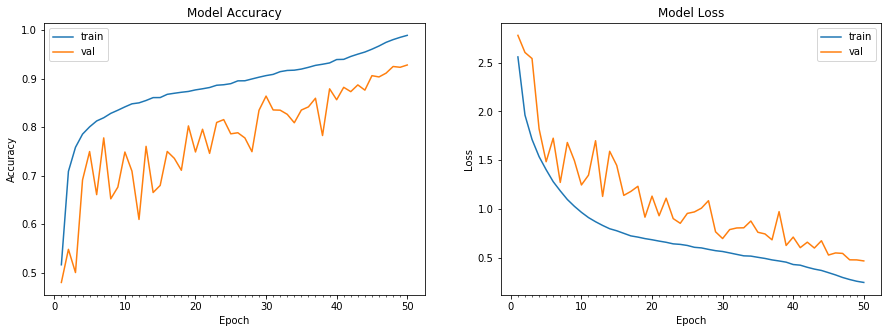

Accuracy on test data is: 92.82


In [0]:
# plot model history
plot_model_history(modelCLR)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, modelmod))

In [0]:
final_loss, final_acc = modelmod.evaluate(test_features, test_labels, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

10000/10000 [==============================] - 7s 692us/step
Final loss: 0.467207, final accuracy: 0.928200
Current time: 2019-07-30 17:36:38.501956


In [0]:
Y_pred = modelmod.predict(test_features)
CFMatrix = show_classification_matrix(Y_pred,test_labels)
currentDT = datetime.datetime.now()
print("Current time:", currentDT)

Confusion matrix:
[[933   9  11   2   3   2   4   2  23  11]
 [  0 978   0   1   0   0   0   0   4  17]
 [ 30   1 894  15  14  12  27   3   3   1]
 [ 13   2  20 848  12  52  38   6   5   4]
 [  8   0  16  18 923  13  12  10   0   0]
 [  4   2  10  80  10 876   8  10   0   0]
 [  5   2   5  10   1   2 972   1   1   1]
 [  7   0   5   6  13  10   1 958   0   0]
 [ 24  10   2   1   2   0   1   0 949  11]
 [  7  30   1   4   0   0   0   0   7 951]]
Current time: 2019-07-30 17:36:51.010210


<Figure size 720x432 with 0 Axes>

Confusion matrix, without normalization
[[933   9  11   2   3   2   4   2  23  11]
 [  0 978   0   1   0   0   0   0   4  17]
 [ 30   1 894  15  14  12  27   3   3   1]
 [ 13   2  20 848  12  52  38   6   5   4]
 [  8   0  16  18 923  13  12  10   0   0]
 [  4   2  10  80  10 876   8  10   0   0]
 [  5   2   5  10   1   2 972   1   1   1]
 [  7   0   5   6  13  10   1 958   0   0]
 [ 24  10   2   1   2   0   1   0 949  11]
 [  7  30   1   4   0   0   0   0   7 951]]


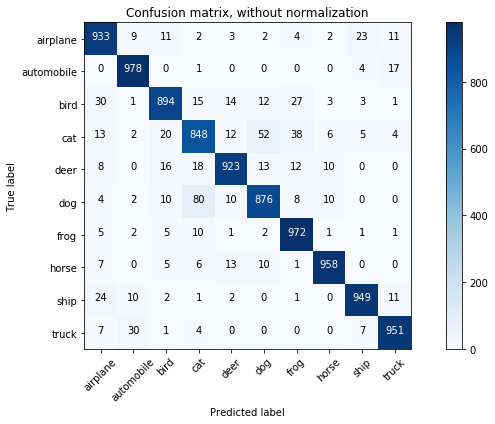

In [0]:
# Names of predicted classes
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CFMatrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Filtering our misclassified images

Aim of this section is to find out top 25 misclassified images.

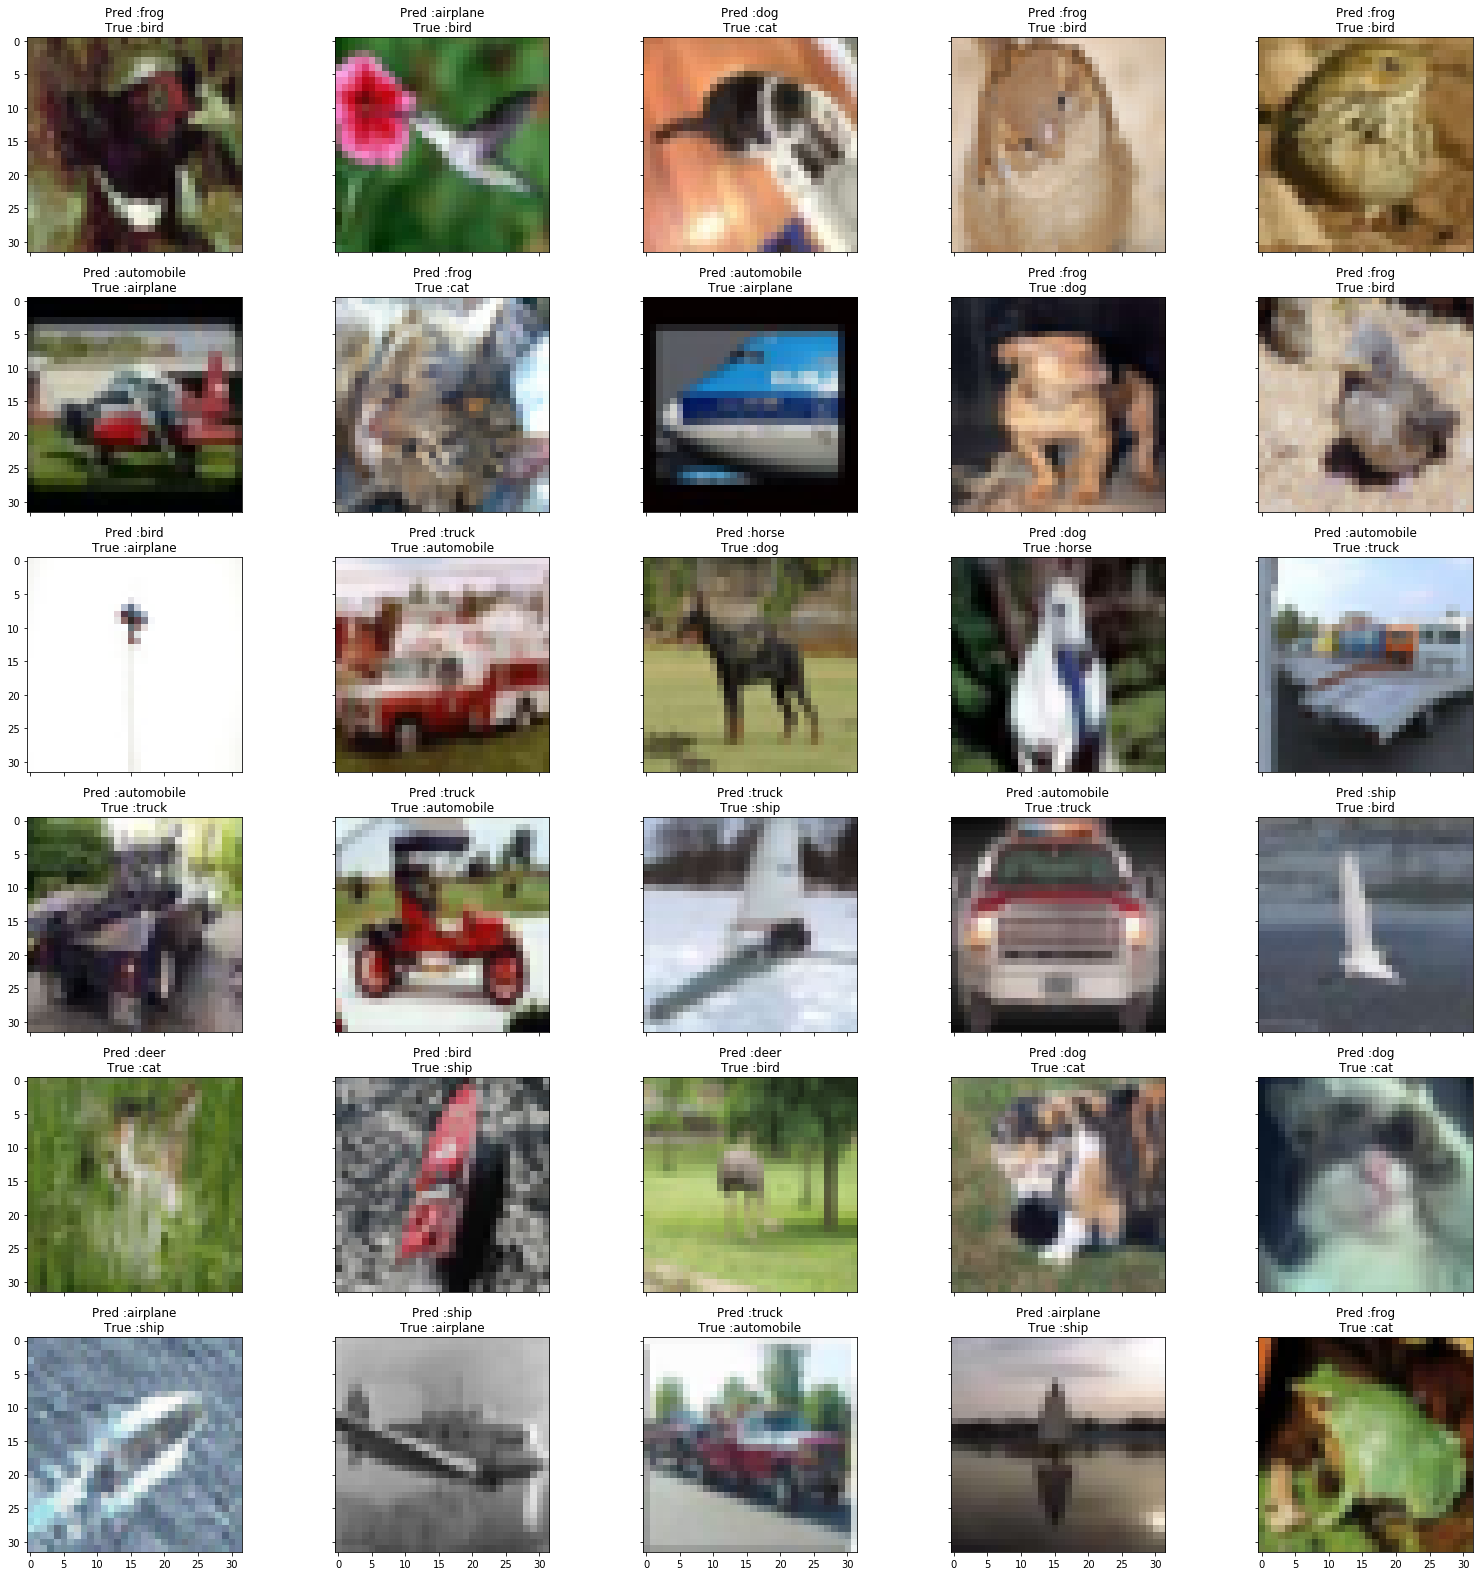

In [0]:
show_misclassified_images(Y_pred=Y_pred,Y_true_nor=test_labels,X_test=test_features)

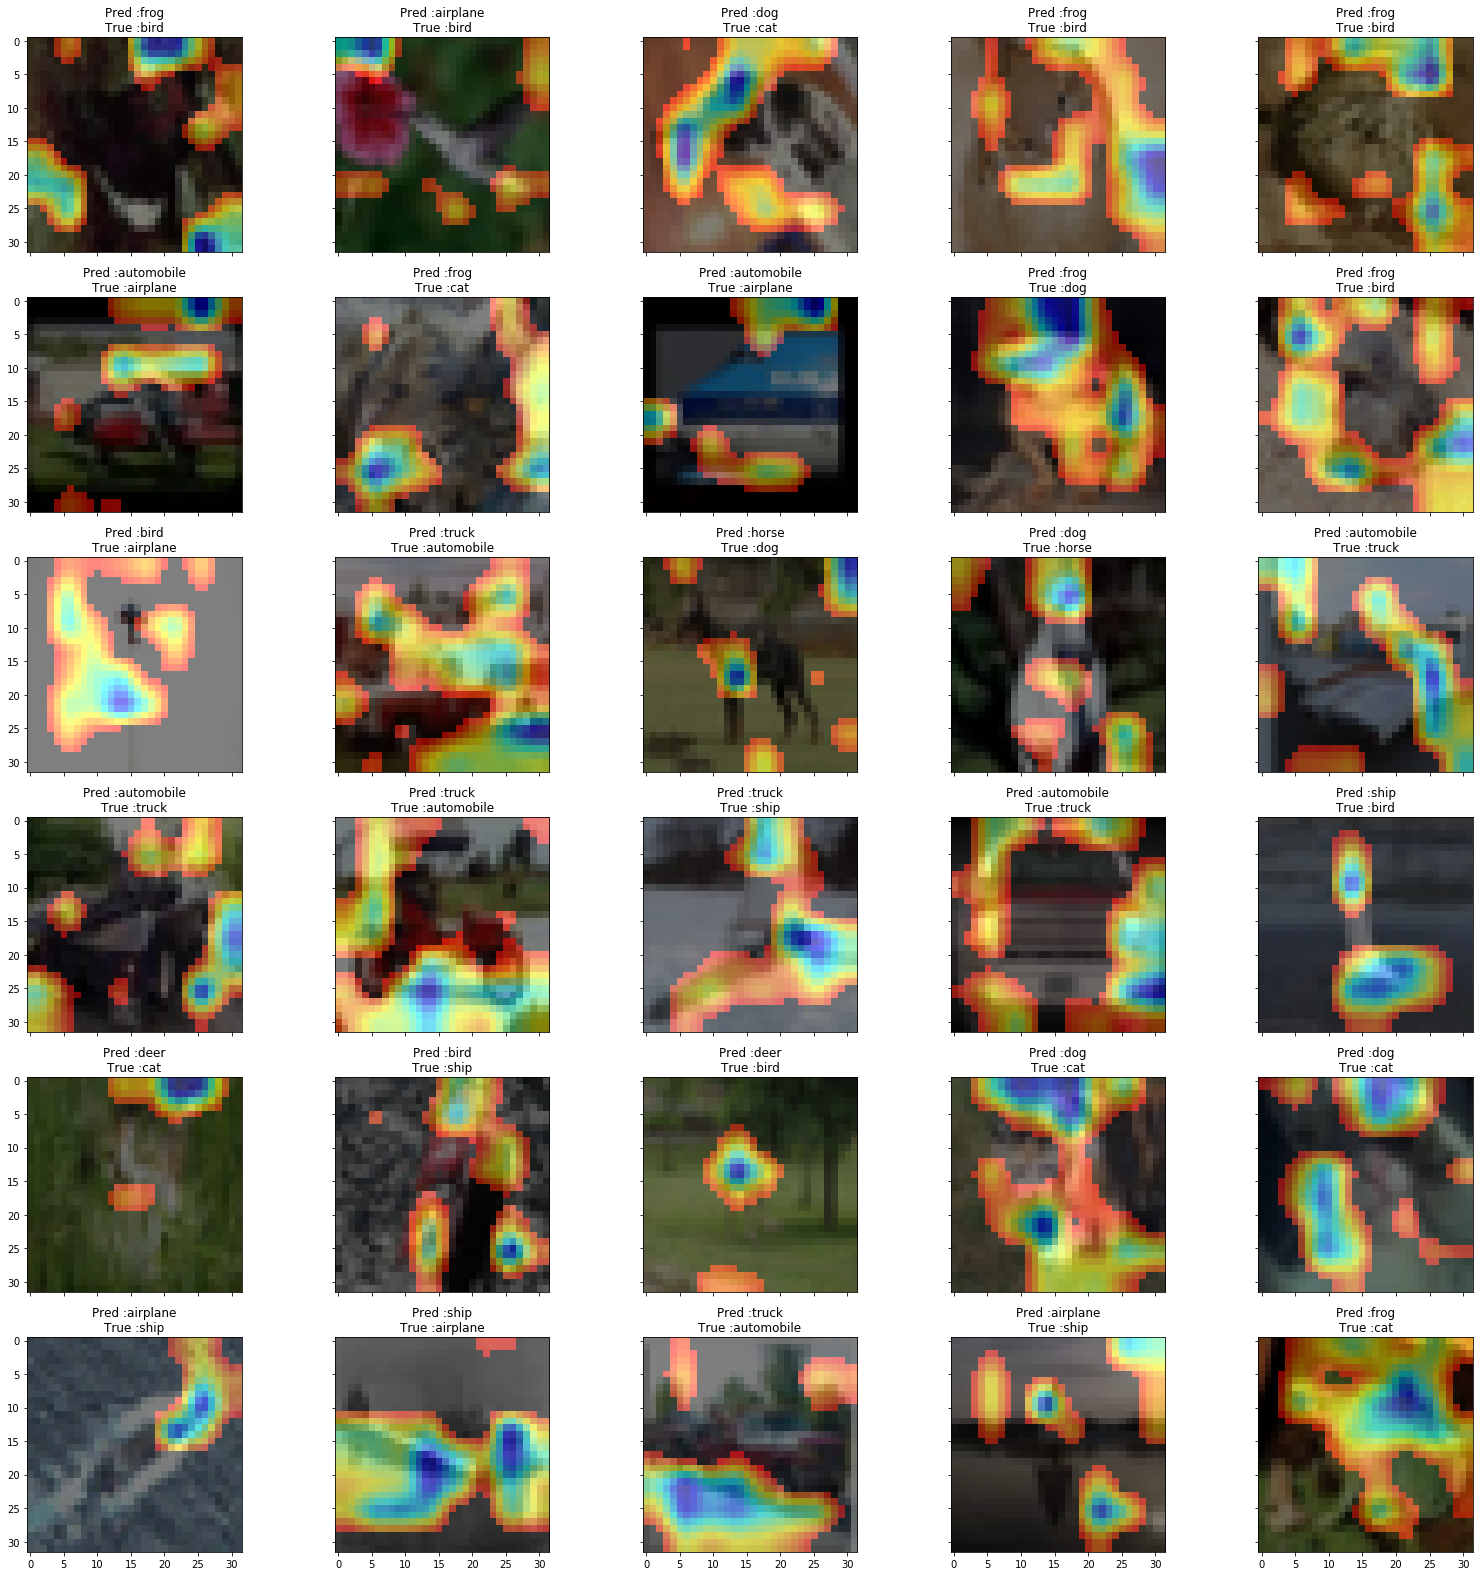

In [0]:
show_misclassified_gradcam_heatmap_images(Y_pred=Y_pred,Y_true_nor=test_labels,X_test=test_features)